In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [3]:
cd "/content/drive/My Drive/Colab Notebooks/dw_matrix"

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [6]:
df = pd.read_csv('data/men_shoes.csv', low_memory= False)
df.shape

(18280, 48)

In [31]:
df.sample(10)

,id,asins,brand,categories,colors,count,dateadded,dateupdated,descriptions,dimension,ean,features,flavors,imageurls,isbn,keys,manufacturer,manufacturernumber,merchants,name,prices_amountmin,prices_amountmax,prices_availability,prices_color,prices_condition,prices_count,prices_currency,prices_dateadded,prices_dateseen,prices_flavor,prices_issale,prices_merchant,prices_offer,prices_returnpolicy,prices_shipping,prices_size,prices_source,prices_sourceurls,prices_warranty,quantities,reviews,sizes,skus,sourceurls,upc,vin,websiteids,weight,brand_cat
17528,AVpffRZn1cnluZ0-ln6z,NaN,Deer Stags,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-11-07T00:00:53Z,2016-11-07T00:00:53Z,"[{""dateSeen"":[""2016-11-07T00:00:52Z""],""sourceU...",NaN,7.030228e+11,"[{""key"":""Occasion"",""value"":[""Casual""]},{""key"":...",NaN,https://i5.walmartimages.com/asr/6ba306d4-5b33...,NaN,"deerstags/mngrvegablkm120,703022764171,0703022...",Deer Stags,MNGR-VEGA-BLK-M-120,"[{""dateSeen"":[""2016-11-07T00:00:53Z""],""name"":""...",Deer Stags Men's Manager Loafer In Black,40.00,40.00,NaN,NaN,new,NaN,USD,2016-11-07T00:00:53Z,2016-11-05T00:00:00Z,NaN,False,ApparelSave - Walmart.com,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Deer-Stags-Men-s-Ma...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Deer-Stags-Men-s-Ma...,7.030228e+11,NaN,NaN,NaN,342
5612,AVpfHY57LJeJML432tY6,NaN,Habitattrade,"Clothing, Shoes & Jewelry,Clothing,Men's Cloth...",NaN,NaN,2016-03-22T23:45:17Z,2016-03-29T05:06:44Z,NaN,19 in x 14 in x 0.01 in,NaN,"[{""key"":""Style"",""value"":[""Socks""]},{""key"":""Siz...",NaN,http://c.shld.net/rpx/i/s/pi/mp/10151117/prod_...,NaN,habitattradehabitatpodpatterncrewsocksgreenbla...,NaN,ESS4XHAB0PDPTCGGKK,NaN,Habitattrade Habitat Pod Pattern Crew Socks Gr...,9.98,9.98,NaN,NaN,NaN,NaN,USD,2016-03-22T23:45:17Z,2016-03-23T00:00:00Z,NaN,False,Universo Extremo Boards,NaN,NaN,NaN,NaN,NaN,http://www.sears.com/content/pdp/products/pric...,NaN,NaN,NaN,NaN,"[{""sourceURLs"":[""http://www.sears.com/content/...",http://www.sears.com/content/pdp/products/pric...,NaN,NaN,NaN,NaN,817
100,AVpfATG7ilAPnD_xS08v,NaN,Jaald,"Clothing, Shoes & Accessories,Men's Accessorie...",Brown,NaN,2016-05-17T23:36:32Z,2016-05-18T03:26:33Z,NaN,NaN,7.118302e+11,"[{""key"":""Style"",""value"":[""Messenger/Shoulder B...",NaN,http://i.ebayimg.com/images/g/xg8AAOSwnH1WW4Wt...,NaN,mensgenuineleathercrossbodyvintageshouldermess...,NaN,NaN,"[{""dateSeen"":[""2016-05-17T00:00:00Z""],""name"":""...",Men's Genuine Leather Cross Body Vintage Shoul...,68.92,68.92,NaN,NaN,New with tags,NaN,USD,2016-05-17T23:36:32Z,2016-05-17T00:00:00Z,NaN,False,NaN,NaN,NaN,FREE,NaN,NaN,http://www.ebay.com/itm/Mens-Genuine-Leather-C...,NaN,NaN,NaN,NaN,"[{""sourceURLs"":[""http://www.ebay.com/itm/Mens-...",http://www.ebay.com/itm/Mens-Genuine-Leather-C...,7.118302e+11,NaN,NaN,NaN,41
12004,AVpfsdYK1cnluZ0-pjik,NaN,Unbranded,"Clothing, Shoes & Accessories,Men's Accessorie...",Coffee,NaN,2015-11-16T12:14:26Z,2016-04-25T02:28:52Z,NaN,NaN,6.935281e+12,"[{""key"":""Style"",""value"":[""Clutch bag""]},{""key""...",NaN,http://i.ebayimg.com/images/g/HosAAOSw~gRVmkC2...,NaN,"6935280525292,newmensvintagefauxleatherclutchb...",NaN,NaN,"[{""dateSeen"":[""2016-04-22T00:00:00Z""],""name"":""...",New Men's Vintage Faux Leather Clutch Bag Busi...,23.49,23.49,NaN,NaN,New with tags,NaN,USD,2015-11-16T12:14:26Z,2016-04-22T00:00:00Z,NaN,True,beeleemoon2288 - Ebay.com,NaN,NaN,FREE,NaN,NaN,http://www.ebay.com/itm/New-Mens-Vintage-Faux-...,NaN,NaN,NaN,NaN,"[{""sourceURLs"":[""http://www.ebay.com/itm/New-M...",http://www.ebay.com/itm/New-Mens-Vintage-Faux-...,NaN,NaN,NaN,NaN,62
11208,AVpfKTeNLJeJML433r_c,B002USETW0,Nike,"Sunglasses,Walmart Vision Centers,Health,Acces...","Violet Red,Blue,Black,Seaspray Framegrey Lense...",NaN,2015-12-03T21:27:54Z,2017-01-14T19:33:31Z,"[{""dateSeen"":[""2017-01-14T19:33:31Z""],""sourceU...",NaN,8.262182e+11,"[{""key"":""Primary Color"",""value"":[""Blue""]},{""ke...",NaN,https://i5.walmartimages.com/asr/dd0

In [7]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [10]:
mean_price = np.mean(df["prices_amountmin"])
mean_price

93.53952188183217

In [14]:
y_true = df['prices_amountmin']
y_pred = [mean_price]*y_true.shape[0]

mean_absolute_error(y_true, y_pred)

63.968341227870624

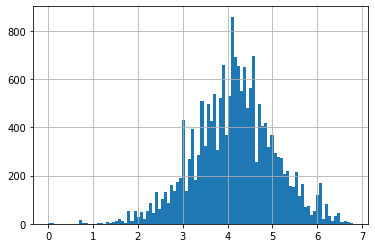

In [12]:
np.log(df['prices_amountmin']+1).hist(bins=100)

In [16]:
y_true = df['prices_amountmin']
y_pred = [np.median(y_true)]*y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.01120240700219

In [18]:
y_true = df['prices_amountmin']
price_log_mean = np.expm1(np.mean(np.log1p(y_true)))
y_pred = [price_log_mean]*y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.03539547661041

In [0]:
df['brand_cat'] = df['brand'].factorize()[0]
df['manufacturer_cat'] = df['manufacturer'].factorize()[0]
df['prices_shipping_cat'] = df['prices_shipping'].factorize()[0]

In [26]:
feats = ['brand_cat']
X = df[feats].values
y = df["prices_amountmin"].values

model = DecisionTreeRegressor(max_depth=5)
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-58.38655694633361, 4.223555478221712)

In [0]:
feats = ['brand_cat']
def run_models(feats):
  X = df[feats].values
  y = df["prices_amountmin"].values

  model = DecisionTreeRegressor(max_depth=5)
  scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

In [29]:
run_models(['brand_cat'])

(-58.38655694633361, 4.223555478221712)

In [34]:
run_models(['manufacturer_cat'])

(-63.133649278023746, 3.394307434888982)

In [35]:
run_models(['prices_shipping_cat'])

(-59.668309751711945, 4.961893556884455)

In [36]:
run_models(['brand_cat', 'manufacturer_cat', 'prices_shipping_cat'])

(-60.19896925265838, 4.375693772917836)

In [37]:
!git status

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   matrix_one/Dzien_3.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [38]:
!git status

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   matrix_one/Dzien_3.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [0]:
!git add day_4.ipynb 